In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
%matplotlib inline
from IPython.display import Image
from IPython.display import HTML

In [2]:
training_set = pd.read_csv('data/train.csv')
training_set.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
training_set.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
#USA = United States = US lo consideramos como parte de la capital de estados unidos, Washington, D.C.
training_set['location'] = training_set['location'].apply(lambda x: 'Washington, D.C.' if x == 'US' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Washington, D.C.' if x == 'USA' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Washington, D.C.' if x == 'United States' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Washington, D.C.' if x == 'Washington, DC' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Washington, D.C.' if x == 'Washington' else x)
#London, England = London = UK (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'London' if x == 'London, England' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'London' if x == 'London, UK' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'London' if x == 'UK' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'London' if x == 'United Kingdom' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'London' if x == 'England.' else x)
#New York = NYC = New York, NY = New York City
training_set['location'] = training_set['location'].apply(lambda x: 'New York' if x == 'NYC' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'New York' if x == 'New York, NY' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'New York' if x == 'New York City' else x)
#Los Angeles, CA = Los Angeles
training_set['location'] = training_set['location'].apply(lambda x: 'Los Angeles' if x == 'Los Angeles, CA' else x)
#Sacramento, CA = Sacramento
training_set['location'] = training_set['location'].apply(lambda x: 'Sacramento' if x == 'Sacramento, CA' else x)
#San Francisco, CA = San Francisco
training_set['location'] = training_set['location'].apply(lambda x: 'San Francisco' if x == 'San Francisco, CA' else x)
#California, USA = California
training_set['location'] = training_set['location'].apply(lambda x: 'California' if x == 'California, USA' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'California' if x == 'California, United States' else x)
#Pennsylvania, USA = Pennsylvania
training_set['location'] = training_set['location'].apply(lambda x: 'Pennsylvania' if x == 'Pennsylvania, USA' else x)
#Chicago, IL = Chicago
training_set['location'] = training_set['location'].apply(lambda x: 'Chicago' if x == 'Chicago, IL' else x)
#Nashville, TN = Nashville
training_set['location'] = training_set['location'].apply(lambda x: 'Nashville' if x == 'Nashville, TN' else x)
#Denver, Colorado = Colorado
training_set['location'] = training_set['location'].apply(lambda x: 'Colorado' if x == 'Denver, Colorado' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Colorado' if x == 'Denver' else x)
#San Diego, CA
training_set['location'] = training_set['location'].apply(lambda x: 'San Diego' if x == 'San Diego, CA' else x)
#Morioh, Japan = Morioh
training_set['location'] = training_set['location'].apply(lambda x: 'Morioh' if x == 'Morioh, Japan' else x)
#Memphis, TN = Memphis
training_set['location'] = training_set['location'].apply(lambda x: 'Memphis' if x == 'Memphis, TN' else x)
#Dallas, TX = Dallas
training_set['location'] = training_set['location'].apply(lambda x: 'Dallas' if x == 'Dallas, TX' else x)
#Seattle, Washington = Seattle
training_set['location'] = training_set['location'].apply(lambda x: 'Seattle' if x == 'Seattle, Washington' else x)
#Nigeria = Abuya (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Abuya' if x == 'Nigeria' else x)
#Canada = Ottawa (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Ottawa' if x == 'Canada' else x)
#Indonesia = Yakarta (capital) = Jakarta/Kuala Lumpur/S'pore
training_set['location'] = training_set['location'].apply(lambda x: 'Yakarta' if x == 'Indonesia' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Yakarta' if x == 'Jakarta/Kuala Lumpur/S\'pore' else x)
#Kenya = Nairobi (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Nairobi' if x == 'Kenya' else x)
#Australia = Canberra (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Canberra' if x == 'Australia' else x)
#South Africa = Pretoria (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Pretoria' if x == 'South Africa' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Pretoria' if x == 'AFRICA' else x)
#India = Nueva Delhi (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Nueva Delhi' if x == 'India' else x)
#Ireland = Dublín (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Dublín' if x == 'Ireland' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Dublín' if x == 'Dublin' else x)

In [5]:
#limpiamos los que no son regiones
training_set = training_set.loc[(~training_set.location.str.contains('Earth', na=False))
                                & (~training_set.location.str.contains('Everywhere', na=False))
                                & (~training_set.location.str.contains('ss', na=False))
                                & (~training_set.location.str.contains('Worldwide', na=False))
                                & (~training_set.location.str.contains('304', na=False))
                                & (~training_set.location.str.contains('World Wide!!', na=False))
                                & (~training_set.location.str.contains('Nowhere. Everywhere.', na=False))
                                & (~training_set.location.str.contains('Happily Married with 2 kids', na=False))
                                & (~training_set.location.str.contains('Pedophile hunting ground', na=False))
                                & (~training_set.location.str.contains('milky way', na=False))
                                & (~training_set.location.str.contains('Live On Webcam', na=False))
                                & (~training_set.location.str.contains('Est. September 2012 - Bristol', na=False))
                                & (~training_set.location.str.contains('Road to the Billionaires Club', na=False))
                                & (~training_set.location.str.contains('Buy Give Me My Money', na=False))
                                & (~training_set.location.str.contains('Narnia', na=False))
                                & (~training_set.location.str.contains('Twitter Lockout in progress', na=False))
                                & (~training_set.location.str.contains('hollywoodland', na=False))
                               ]

In [6]:
location_tweets = training_set.loc[:,['location', 'target']]
location_tweets = location_tweets.loc[pd.notna(location_tweets.location) & pd.notnull(location_tweets.location)]
location_tweets.head(10)

,location,target
31,Birmingham,1
33,Pretoria,1
34,"Philadelphia, PA",0
35,London,0
36,Pretoria,0
39,Paranaque City,0
46,"GREENSBORO,NORTH CAROLINA",1
49,London,0
50,"Sheffield Township, Ohio",1
51,Nueva Delhi,1


In [7]:
location_tweets = location_tweets.groupby(['location', 'target']).size().reset_index()
location_tweets.rename({0:'count_location'}, axis=1, inplace=True)
location_tweets.describe()

,target,count_location
count,3468.000000,3468.000000
mean,0.414648,1.398789
std,0.492732,3.344962
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,126.000000


In [8]:
location_tweets.sort_values(by='count_location', ascending=False, inplace=True)
location_tweets.head(10)

,location,target,count_location
2903,"Washington, D.C.",1,126
1897,New York,0,77
2902,"Washington, D.C.",0,73
1554,London,0,65
1555,London,1,42
1898,New York,1,31
1578,Los Angeles,0,24
601,California,0,22
235,Abuya,1,22
1989,Nueva Delhi,1,20


In [9]:
location_tweets_reales = location_tweets.loc[location_tweets.target == 1]
location_tweets_fakes = location_tweets.loc[location_tweets.target == 0]

In [10]:
location_tweets_reales.describe()

,target,count_location
count,1438.0,1438.000000
mean,1.0,1.467316
std,0.0,3.816782
min,1.0,1.000000
25%,1.0,1.000000
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,126.000000


In [11]:
location_tweets_fakes.describe()

,target,count_location
count,2030.0,2030.000000
mean,0.0,1.350246
std,0.0,2.965713
min,0.0,1.000000
25%,0.0,1.000000
50%,0.0,1.000000
75%,0.0,1.000000
max,0.0,77.000000


In [12]:
location_tweets_reales.head(20)

,location,target,count_location
2903,"Washington, D.C.",1,126
1555,London,1,42
1898,New York,1,31
235,Abuya,1,22
1989,Nueva Delhi,1,20
1780,Mumbai,1,19
602,California,1,16
1579,Los Angeles,1,15
2350,San Francisco,1,13
2058,Ottawa,1,13


In [13]:
location_tweets_fakes.head(20)

,location,target,count_location
1897,New York,0,77
2902,"Washington, D.C.",0,73
1554,London,0,65
1578,Los Angeles,0,24
601,California,0,22
1838,Nairobi,0,16
2057,Ottawa,0,16
675,Chicago,0,16
2349,San Francisco,0,12
2399,Seattle,0,11


In [14]:
regions = [{'location': 'Washington, D.C.', 'latitude': 38.8951111, 'longitude': -77.0363693},
           {'location': 'New York', 'latitude': 40.7142715, 'longitude': -74.0059662},
           {'location': 'Abuya', 'latitude': 9.06447, 'longitude': 7.48321},
           {'location': 'London', 'latitude': 51.5085297, 'longitude': -0.12574},
           {'location': 'Nueva Delhi', 'latitude': 28.6519508, 'longitude': 77.2314911},
           {'location': 'Mumbai', 'latitude': 19.0712, 'longitude': 72.8762},
           {'location': 'California', 'latitude': 37.7272, 'longitude': -123.032},
           {'location': 'Los Angeles', 'latitude': 34.0522308, 'longitude': -118.2436829},
           {'location': 'Ottawa', 'latitude': 45.411171, 'longitude': -75.6981201},
           {'location': 'San Francisco', 'latitude': 37.7272, 'longitude': -123.032},
           {'location': 'Chicago', 'latitude': 41.850029, 'longitude': -87.6500473},
           {'location': 'Yakarta', 'latitude': -6.20199, 'longitude': 106.829},
           {'location': 'Sacramento', 'latitude': 38.5815697, 'longitude': -121.4944},
           {'location': 'Colorado', 'latitude': 38.8338814, 'longitude': -104.8213577},
           {'location': 'Canberra', 'latitude': -35.2834587, 'longitude': 149.128067},
           {'location': 'Nashville', 'latitude': 36.1658897, 'longitude': -86.7844391},
           {'location': 'Memphis', 'latitude': 35.1495285, 'longitude': -90.0489807},
           {'location': 'Nairobi', 'latitude': -1.29233, 'longitude': 36.82},
           {'location': 'Toronto', 'latitude': 43.7001114, 'longitude': -79.4162979},
           {'location': 'Florida', 'latitude': 25.7742691, 'longitude': -80.1936569},
           {'location': 'Seattle', 'latitude': 47.6062088, 'longitude': -122.3320694},
           {'location': 'Pennsylvania', 'latitude': 39.9523315, 'longitude': -75.1637878},
           {'location': 'Pretoria', 'latitude': -25.7448597, 'longitude': 28.18783},
           {'location': 'San Diego', 'latitude': 32.7153282, 'longitude': -117.1572571},
           {'location': 'Texas', 'latitude': 35.3236900, 'longitude': -92.2890400},
           {'location': 'Manchester', 'latitude': 53.4809494, 'longitude': 2.2374301},
           {'location': 'Ireland', 'latitude': 53.3434, 'longitude': -6.26761},
           {'location': 'Morioh', 'latitude': 36.2048225, 'longitude': 138.2529297}]
regions = pd.DataFrame(regions)

In [15]:
regions_location_tweets_reales = location_tweets_reales.merge(regions, on=['location'], how='inner')
regions_location_tweets_reales.head(20)

,location,target,count_location,latitude,longitude
0,"Washington, D.C.",1,126,38.895111,-77.036369
1,London,1,42,51.508530,-0.125740
2,New York,1,31,40.714272,-74.005966
3,Abuya,1,22,9.064470,7.483210
4,Nueva Delhi,1,20,28.651951,77.231491
5,Mumbai,1,19,19.071200,72.876200
6,California,1,16,37.727200,-123.032000
7,Los Angeles,1,15,34.052231,-118.243683
8,San Francisco,1,13,37.727200,-123.032000
9,Ottawa,1,13,45.411171,-75.698120


In [16]:
def generate_file_kml(nombre):
    archivo = open(nombre, "w")
    archivo.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    archivo.write('<kml xmlns="http://earth.google.com/kml/2.1">\n')
    archivo.write("\t<Document>\n")
    archivo.write("\t\t<name>" + nombre + "</name>\n")
    archivo.write("\n")
    archivo.close()
    
def add_region(file, region, coordinates):
    archivo = open(file, "a")
    archivo.write("\t\t<Placemark>\n")
    archivo.write("\t\t\t<name>" + region + "</name>\n")
    archivo.write("\t\t\t<region>" + region + "</region>\n")
    archivo.write("\t\t\t<Point>\n")
    archivo.write("\t\t\t\t<coordinates>" + coordinates + "</coordinates>\n")
    archivo.write("\t\t\t</Point>\n")
    archivo.write("\t\t</Placemark>\n")
    archivo.write("\n")

def close_file_kml(file):
    archivo = open(file, "a")
    archivo.write("\t</Document>\n")
    archivo.write("</kml>")
    archivo.close()

generate_file_kml('regiones_con_mas_tweets_reales.kml')
for i in range(20):
    add_region('regiones_con_mas_tweets_reales.kml', str(regions_location_tweets_reales['location'][i]),str(regions_location_tweets_reales['longitude'][i])+','+str(regions_location_tweets_reales['latitude'][i]))
close_file_kml('regiones_con_mas_tweets_reales.kml')

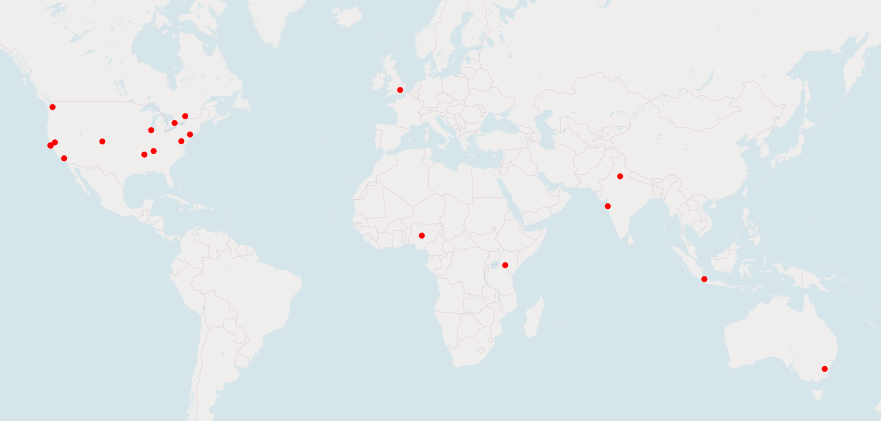

In [17]:
Image("regiones_con_mas_tweets_reales.png")

In [18]:
regions_location_tweets_fakes = location_tweets_fakes.merge(regions, on=['location'], how='inner')
regions_location_tweets_fakes.head(20)

,location,target,count_location,latitude,longitude
0,New York,0,77,40.714272,-74.005966
1,"Washington, D.C.",0,73,38.895111,-77.036369
2,London,0,65,51.508530,-0.125740
3,Los Angeles,0,24,34.052231,-118.243683
4,California,0,22,37.727200,-123.032000
5,Nairobi,0,16,-1.292330,36.820000
6,Ottawa,0,16,45.411171,-75.698120
7,Chicago,0,16,41.850029,-87.650047
8,San Francisco,0,12,37.727200,-123.032000
9,Seattle,0,11,47.606209,-122.332069


In [19]:
def generate_file_kml(nombre):
    archivo = open(nombre, "w")
    archivo.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    archivo.write('<kml xmlns="http://earth.google.com/kml/2.1">\n')
    archivo.write("\t<Document>\n")
    archivo.write("\t\t<name>" + nombre + "</name>\n")
    archivo.write("\n")
    archivo.close()
    
def add_region(file, region, coordinates):
    archivo = open(file, "a")
    archivo.write("\t\t<Placemark>\n")
    archivo.write("\t\t\t<name>" + region + "</name>\n")
    archivo.write("\t\t\t<region>" + region + "</region>\n")
    archivo.write("\t\t\t<Point>\n")
    archivo.write("\t\t\t\t<coordinates>" + coordinates + "</coordinates>\n")
    archivo.write("\t\t\t</Point>\n")
    archivo.write("\t\t</Placemark>\n")
    archivo.write("\n")

def close_file_kml(file):
    archivo = open(file, "a")
    archivo.write("\t</Document>\n")
    archivo.write("</kml>")
    archivo.close()

generate_file_kml('regiones_con_mas_tweets_falsos.kml')
for i in range(20):
    add_region('regiones_con_mas_tweets_falsos.kml', str(regions_location_tweets_fakes['location'][i]),str(regions_location_tweets_fakes['longitude'][i])+','+str(regions_location_tweets_fakes['latitude'][i]))
close_file_kml('regiones_con_mas_tweets_falsos.kml')

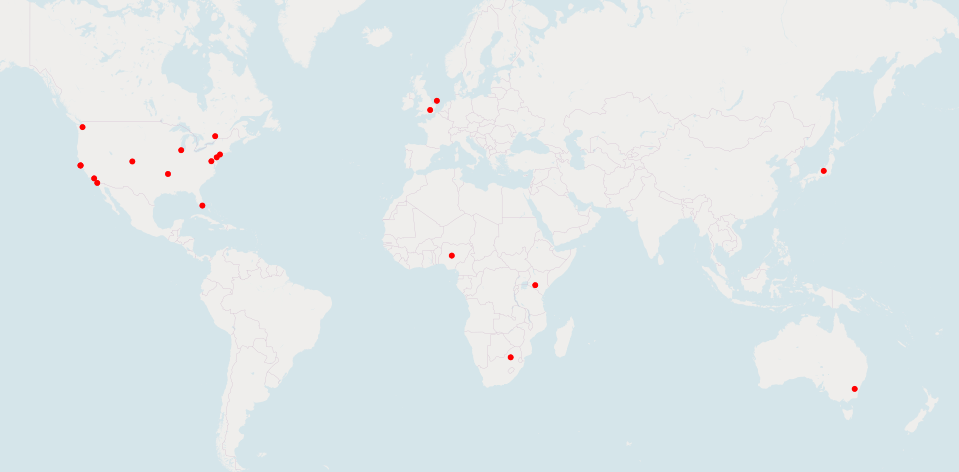

In [20]:
Image("regiones_con_mas_tweets_falsos.png")

In [21]:
keyword_tweets = training_set.loc[:,['keyword', 'target']]
keyword_tweets = keyword_tweets.loc[pd.notna(keyword_tweets.keyword) & pd.notnull(keyword_tweets.keyword)]
keyword_tweets.head(20)

,keyword,target
31,ablaze,1
33,ablaze,1
34,ablaze,0
35,ablaze,0
36,ablaze,0
38,ablaze,1
39,ablaze,0
41,ablaze,0
43,ablaze,0
44,ablaze,0


In [22]:
keyword_tweets = keyword_tweets.groupby(['keyword', 'target']).size().reset_index()
keyword_tweets.rename({0:'count_keyword'}, axis=1, inplace=True)
keyword_tweets.describe()

,target,count_keyword
count,438.000000,438.000000
mean,0.502283,16.719178
std,0.500567,9.643112
min,0.000000,1.000000
25%,0.000000,8.000000
50%,1.000000,16.000000
75%,1.000000,25.000000
max,1.000000,40.000000


In [23]:
keyword_tweets.sort_values(by='count_keyword', ascending=False, inplace=True)
keyword_tweets.head(40)

,keyword,target,count_keyword
57,body%20bags,0,40
304,outbreak,1,39
435,wreckage,1,39
138,derailment,1,39
123,debris,1,37
408,typhoon,1,37
302,oil%20spill,1,37
337,ruin,0,36
436,wrecked,0,36
124,deluge,0,36


In [24]:
location_keyword_tweets = training_set.loc[:,['location', 'keyword', 'target']]
location_keyword_tweets = location_keyword_tweets.loc[pd.notna(location_keyword_tweets.location) & pd.notnull(location_keyword_tweets.location) & pd.notna(location_keyword_tweets.keyword) & pd.notnull(location_keyword_tweets.keyword)]
location_keyword_tweets.head(20)

,location,keyword,target
31,Birmingham,ablaze,1
33,Pretoria,ablaze,1
34,"Philadelphia, PA",ablaze,0
35,London,ablaze,0
36,Pretoria,ablaze,0
39,Paranaque City,ablaze,0
46,"GREENSBORO,NORTH CAROLINA",ablaze,1
49,London,ablaze,0
50,"Sheffield Township, Ohio",ablaze,1
51,Nueva Delhi,ablaze,1


In [25]:
location_keyword_tweets = location_keyword_tweets.groupby(['location', 'keyword', 'target']).size().reset_index()
location_keyword_tweets.rename({0:'count'}, axis=1, inplace=True)
location_keyword_tweets.describe()

,target,count
count,4489.000000,4489.000000
mean,0.427044,1.080642
std,0.494704,0.559875
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,20.000000


In [26]:
location_keyword_tweets.sort_values(by='count', ascending=False, inplace=True)
location_keyword_tweets.head(20)

,location,keyword,target,count
3846,"Washington, D.C.",sandstorm,1,20
2331,Nairobi,loud%20bang,0,13
2453,New York,flood,0,11
2422,New York,body%20bag,0,11
2258,Mumbai,wreckage,1,10
266,Abuya,suicide%20bomb,1,9
3792,"Washington, D.C.",derailed,1,7
3794,"Washington, D.C.",destroyed,0,7
2589,Nueva Delhi,derailment,1,7
2239,Morioh,detonate,0,6
